In [1]:
import sys
! pip install -U spacy
! python -m spacy download en
! pip install spacy
! pip install spacymoji
! pip install emoji
! pip install scikit-learn
! pip install gensim
! pip install sklearn
! pip install matplotlib
! pip install wordcloud


[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


     --------------------------------------- 12.8/12.8 MB 24.2 MB/s eta 0:00:00
[!] As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use
the full pipeline package name 'en_core_web_sm' instead.
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [41]:
import pandas as pd
import spacy
import emoji
import numpy as np
from tqdm import tqdm

from sklearn.cluster import DBSCAN
from gensim.models import Doc2Vec
from gensim.models.doc2vec import TaggedDocument
from gensim.test.utils import get_tmpfile

In [43]:
datsetPath = '../Datasets/corto.csv'
#datsetPath = '../Datasets/SuicideDetection.csv'
#datsetPath = '../Datasets/Suicide_Detection20000.csv'

data = pd.read_csv(datsetPath)

textos = []
for instancia in data.values:
    textos.append(instancia[1])

In [44]:
# Cuidado! La ejecución de este bloque con 232074 instancias, toma aproximademente 5 min?

nlp = spacy.load("en_core_web_sm") # Cargar modelo
nlp.add_pipe("emoji", first=True)

textos_tokenizados = []
for texto in tqdm(textos, desc="Procesando textos"):
    texto = emoji.demojize(texto)  # Emojis a texto
    texto = texto.replace(':', ' ').replace('filler', ' ').replace('filer', ' ').replace('_', ' ')
    doc = nlp(texto)
    lexical_tokens = [token.lemma_.lower() for token in doc if len(token.text) > 3 and token.is_alpha]
    textos_tokenizados.append(lexical_tokens)

Procesando textos: 100%|██████████| 76/76 [00:02<00:00, 36.06it/s]


In [46]:
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(textos_tokenizados)]
model = Doc2Vec(documents, vector_size=150, window=2, dm=1, epochs=100, workers=4)

model.build_vocab(documents)
model.train(documents, total_examples=model.corpus_count, epochs=model.epochs)

model.save(get_tmpfile("my_doc2vec_model"))


In [47]:
document_vectors = [model.infer_vector(doc) for doc in textos_tokenizados]
print(document_vectors[1])

[-0.27382407 -0.07553478 -0.01599461 -0.15693142 -0.09917651 -0.03364698
  0.0742498  -0.11815616 -0.25486422  0.22429642 -0.17500973 -0.23048583
 -0.05794976  0.0410782  -0.3457275   0.45240414  0.31174007 -0.08651094
 -0.19892815  0.18244022  0.03458867 -0.42689136 -0.0052393   0.18012641
 -0.04720326 -0.0727691  -0.00592211 -0.075689    0.23278083  0.11298825
 -0.10161895  0.25083187  0.03155183 -0.1298842  -0.11484294 -0.03755721
  0.17060241 -0.01211191  0.01972339  0.11018477 -0.09813812 -0.23752862
 -0.13928697 -0.4354914  -0.01680052 -0.29613158  0.20436181 -0.22655891
 -0.19158122  0.27829215 -0.07224879  0.02425084  0.01701086  0.09671944
  0.4961468   0.47833666 -0.27356854 -0.0878587   0.03515518 -0.33209428
  0.04079895  0.29686627  0.06411186  0.24960613  0.00308304 -0.11616009
 -0.21740395 -0.2239227  -0.18094206  0.1879938   0.3432607   0.273992
 -0.0575027  -0.11002203  0.1626825   0.23680432 -0.07187872 -0.06013005
 -0.05357379  0.04037723  0.19550082 -0.2757875   0.1

In [48]:
#import csv
#file_name = "vectoresDoc.tsv"
#with open(file_name, 'w', newline='') as tsvfile:
 #   writer = csv.writer(tsvfile, delimiter='\t')
  #  for vector in document_vectors:
   #     writer.writerow(vector)

In [49]:
#epsilon = 5
#minP = 10

# Con el corto:
epsilon = 7
minP = 2

In [ ]:
import numpy as np

vecinos = []
nucleos = []
#alcanzables = []

for i, doc in enumerate(document_vectors):
    v = []
    for j, doc2 in enumerate(document_vectors):
        distEuc = np.linalg.norm(doc - doc2)
        if distEuc <= epsilon:
            v.append((j,doc2))
    vecinos.append(v)
    if len(v) >= minP:
        nucleos.append((i, doc))


print(f'Tenemos un total de {len(document_vectors)} instancias, de las cuales son:'
      f'\\\nNúcleos: {len(nucleos)}')

#print(f' Nuestros núcleos son: \n {nucleos}')

KeyboardInterrupt: 

In [51]:
clusters = []
numCluster = -1
for i in range(len(document_vectors)):
    clusters.append(-1)

nucleosPorVisitar = []
for i, nucleo in nucleos:
    if clusters[i] == -1:
        numCluster += 1
        clusters[i] = numCluster
        nucleosPorVisitar.append((i, nucleo))
        while nucleosPorVisitar:
            j, nucleo_actual = nucleosPorVisitar.pop()
            for index, vecino in vecinos[j]:
                if clusters[index] == -1:
                    clusters[index] = numCluster
                    if (j, nucleo_actual) in nucleos:
                        nucleosPorVisitar.append((j, nucleo_actual))
print(clusters)

[0, 1, 1, 1, -1, -1, -1, 1, 2, -1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, -1, 1, -1, -1, -1, 1, 3, -1, 1, 1, 0, 4, 0, -1, 1, 1, 5, 6, -1, 1, 0, 1, -1, 1, 7, 1, 1, 1, 1, 1, -1, 8, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1, -1, 9, 1, 1, 1, -1, -1, -1, 1, 1]


In [52]:
extras = 1
if min(clusters)==-1 : extras = 2
total = 0
for cluster in range(min(clusters), max(clusters)+1):
    kont = 0
    for i in clusters:
        if i == cluster:
            kont += 1
    if cluster == -1:
        print(f'Hay un total de {kont} instancias que son ruido')
    else:
        print(f'Del cluster {cluster} hay {kont} instancias')
    total = total + kont

Hay un total de 20 instancias que son ruido
Del cluster 0 hay 4 instancias
Del cluster 1 hay 44 instancias
Del cluster 2 hay 1 instancias
Del cluster 3 hay 1 instancias
Del cluster 4 hay 1 instancias
Del cluster 5 hay 1 instancias
Del cluster 6 hay 1 instancias
Del cluster 7 hay 1 instancias
Del cluster 8 hay 1 instancias
Del cluster 9 hay 1 instancias


In [53]:
clusters_válidos=[]
alcanzables = []
for c in range(numCluster+1):
    if clusters.count(c)<minP:
        for i, clus in enumerate(clusters):
            if clus == c:
                alcanzables.append((i, vecinos[i]))
    else:
        clusters_válidos.append(c)
print(len(clusters_válidos))
print(clusters_válidos)

2
[0, 1]


In [54]:
for i, vecinos in alcanzables:
    previo = clusters[i]
    for j, v in vecinos:
        if clusters[j] in clusters_válidos:
            clusters[i] = clusters[j]
    if previo == clusters[i]:
        clusters[i]=-1

In [55]:
for i in range(len(clusters_válidos)):
    for j in range(len(clusters)):
        if clusters[j] == clusters_válidos[i]: clusters[j] = i

In [56]:
extras = 1
if min(clusters)==-1 : extras = 2
total = 0
for cluster in range(min(clusters), max(clusters)+1):
    kont = 0
    for i in clusters:
        if i == cluster:
            kont += 1
    if cluster == -1:
        print(f'Hay un total de {kont} instancias que son ruido')
    else:
        print(f'Del cluster {cluster} hay {kont} instancias')
    total = total + kont


Hay un total de 20 instancias que son ruido
Del cluster 0 hay 4 instancias
Del cluster 1 hay 52 instancias


In [57]:

for c in range(-1, max(clusters)+1):
    kont=0
    print(f'\n\n\n################################CLUSTER NUMERO {c}################################\n\n\n')
    for i, clus in enumerate(clusters):
        if clus==c and kont<5:
            print(textos[i])
            print('\n\n\n')
            kont+=1
print(len(clusters))





################################CLUSTER NUMERO -1################################



I’m so lostHello, my name is Adam (16) and I’ve been struggling for years and I’m afraid. Through these past years thoughts of suicide, fear, anxiety I’m so close to my limit . I’ve been quiet for so long and I’m too scared to come out to my family about these feelings. About 3 years ago  losing my aunt triggered it all. Everyday feeling hopeless , lost, guilty, and remorseful over her and all the things I’ve done in my life,but thoughts like these with the little I’ve experienced in life? Only time I’ve revealed these feelings to my family is when I broke down where they saw my cuts. Watching them get so worried over something I portrayed as an average day made me feel absolutely dreadful. They later found out I was an attempt survivor from attempt OD(overdose from pills) and attempt hanging. All that happened was a blackout from the pills and I never went through with the noose because I’m still s

In [58]:
print(data)
clases = data['class'].copy()
print(len(clases))
nombres_clases=['suicide', 'non-suicide']
class_to_cluster = []
for i in range(len(clusters_válidos)):
    class_to_cluster.append([0,0])
print(len(clusters))
for i, c in enumerate(clusters):
    if c != -1:
        if clases[i].__eq__('suicide'):
            class_to_cluster[c][0] += 1
        else:
            class_to_cluster[c][1] += 1
print(i)
print(class_to_cluster)

    Unnamed: 0                                               text        class
0            2  Ex Wife Threatening SuicideRecently I left my ...      suicide
1            3  Am I weird I don't get affected by compliments...  non-suicide
2            4  Finally 2020 is almost over... So I can never ...  non-suicide
3            8          i need helpjust help me im crying so hard      suicide
4            9  I’m so lostHello, my name is Adam (16) and I’v...      suicide
..         ...                                                ...          ...
71         107  Anyone planning suicide in the long-term futur...      suicide
72         108  What the fuck?? I finally had the confidence t...  non-suicide
73         110  Screenwriting Course Scripts and Characters th...      suicide
74         111  The reviews on the dildo said weak suction cup...  non-suicide
75         112  Can someone talk to me?I've been staring at th...      suicide

[76 rows x 3 columns]
76
76
75
[[2, 2], [26, 26]]


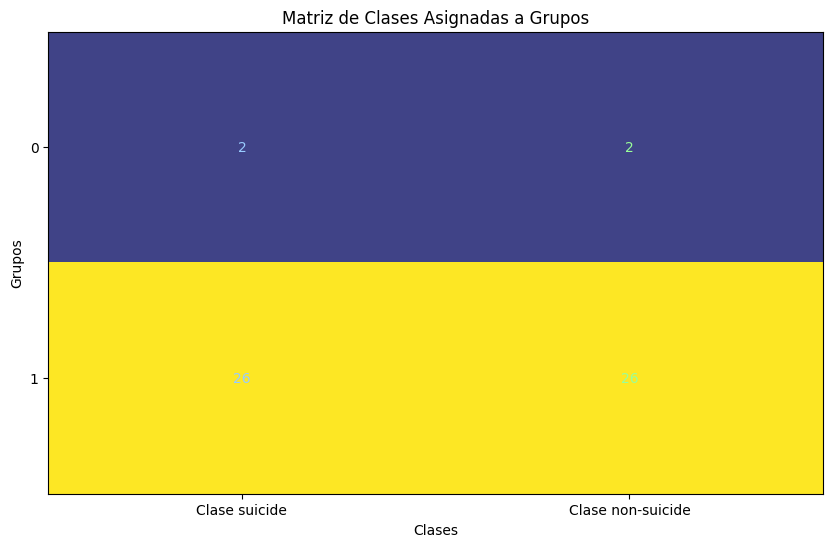

In [59]:
import matplotlib.pyplot as plt
import numpy as np

# Supongamos que tienes 20 grupos y 2 clases
num_groups = len(clusters_válidos)
num_classes = len(nombres_clases)
# Crear una matriz de ejemplo con las instancias de clases en cada grupo
# Esto es solo un ejemplo, debes proporcionar tus datos reales

# Definir colores personalizados (azul y verde claros)
light_blue = (0.6, 0.8, 1.0)  # Color azul claro
light_green = (0.6, 1.0, 0.6)  # Color verde claro

# Crear una figura y mostrar la matriz con los colores personalizados
plt.figure(figsize=(10, 6))
plt.imshow(class_to_cluster, cmap='viridis', aspect='auto', interpolation='nearest', vmin=0, vmax=10)

# Personalizar el eje x y el eje y para mostrar los grupos y las clases
plt.xticks(range(num_classes), [f'Clase {nombres_clases[i]}' for i in range(num_classes)])
plt.yticks(range(num_groups), [f'{clusters_válidos[i]}' for i in range(num_groups)])

# Usar los colores personalizados para mostrar la matriz
for i in range(num_groups):
    for j in range(num_classes):
        plt.text(j, i, class_to_cluster[i][j], ha='center', va='center', color=light_blue if j == 0 else light_green)

# Etiquetas para los ejes
plt.xlabel("Clases")
plt.ylabel("Grupos")

plt.title("Matriz de Clases Asignadas a Grupos")
plt.show()



In [60]:
palabras_del_cluster = []
for c in range(-1, max(clusters)+1):
    palabras_c = ' '
    for i, clus in enumerate(clusters):
        if clus==c:
            t = ' '.join(textos_tokenizados[i])
            palabras_c = palabras_c + ' ' + t
    palabras_del_cluster.append(palabras_c)




###################################CLUSTER -1##########################################





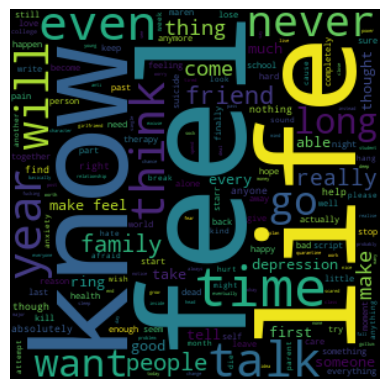




###################################CLUSTER 0##########################################





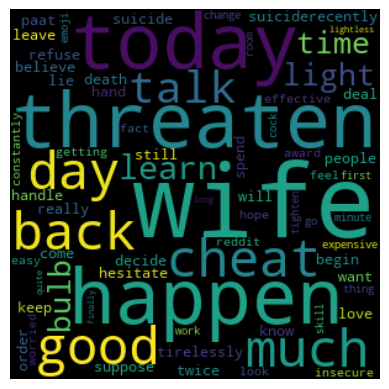




###################################CLUSTER 1##########################################





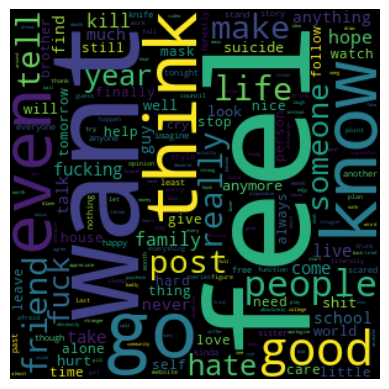

In [61]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
for i in range(len(palabras_del_cluster)):
    print(f'\n\n\n###################################CLUSTER {i-1}##########################################\n\n\n')
    wc = WordCloud(width = 300, height= 300).generate(palabras_del_cluster[i])
    plt.axis("off")
    plt.imshow(wc, interpolation="bilinear")
    plt.show()

In [62]:

from mpl_toolkits.mplot3d import Axes3D  # Necesario para gráficos 3D

def plot_samples(samples, n_dimensiones, X_train_space, cluster_labels):
    if n_dimensiones == 2:
        # Dibujar los puntos en el espacio, color: cluster
        plt.scatter(X_train_space[:samples, 0], X_train_space[:samples, 1], cmap=plt.cm.get_cmap('nipy_spectral', 10), c=cluster_labels[:samples])
        plt.colorbar()
    elif n_dimensiones == 3:
        fig = plt.figure(figsize=(5, 5))
        ax = fig.add_subplot(111, projection='3d')
        sc = ax.scatter(X_train_space[:samples, 0], X_train_space[:samples, 1], X_train_space[:samples, 2], cmap='viridis', c=cluster_labels[:samples])
        plt.legend(*sc.legend_elements(), title="Clases")
        # Mostrar la gráfica en 3D
        plt.show()
    else:
        pass

# Llama a la función plot_samples con tus datos y la cantidad de instancias a mostrar
# plot_samples(samples, n_dimensiones, X_train_space)


Dim after PCA:  (76, 2)


C:\Users\maiti\AppData\Local\Temp\ipykernel_11700\1128388079.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(X_train_space[:samples, 0], X_train_space[:samples, 1], cmap=plt.cm.get_cmap('nipy_spectral', 10), c=cluster_labels[:samples])


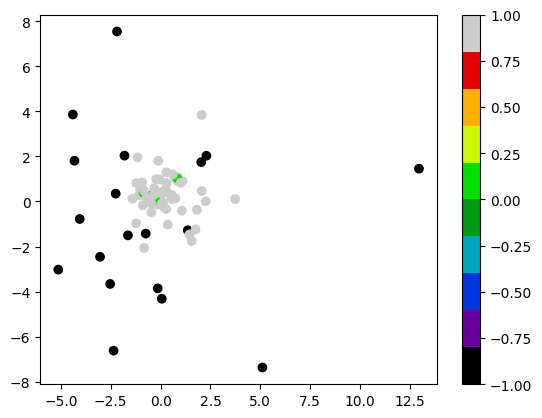

In [63]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
n_dimensiones= 2
pca = PCA(n_components=n_dimensiones, random_state=42)
pca.fit(document_vectors)
# Cambio de base a dos dimensiones PCA
X_train_PCAspace = pca.transform(document_vectors)
print('Dim after PCA: ',X_train_PCAspace.shape)
plot_samples(300, n_dimensiones, X_train_PCAspace, clusters)

In [64]:
# Aplicar DBSCAN a los vectores de documentos
dbscan = DBSCAN(eps=epsilon, min_samples=minP)  # Ajusta los parámetros según tu caso
model=dbscan.fit(document_vectors)
cluster_labels = dbscan.fit_predict(document_vectors)

# Los resultados del clustering están en 'labels'
print("Etiquetas de clusters:", cluster_labels)

Etiquetas de clusters: [ 0  0  0  0 -1 -1 -1  0  0 -1  0  0  0  0  0  0 -1  0  0  0 -1  0 -1 -1
 -1  0  0 -1  0  0  0  0  0 -1  0  0  0  0 -1  0  0  0 -1  0  0  0  0  0
  0  0 -1  0  0  0  0  0  0  0  0  0  0 -1 -1  0  0  0 -1  0  0  0  0 -1
 -1 -1  0  0]


In [65]:
extras = 1
if min(cluster_labels)==-1 : extras = 2
total = 0
for cluster in range(min(cluster_labels), max(cluster_labels)+1):
    kont = 0
    for i in cluster_labels:
        if i == cluster:
            kont += 1
    if cluster == -1:
        print(f'Hay un total de {kont} instancias que son ruido')
    else:
        print(f'Del cluster {cluster} hay {kont} instancias')
    total = total + kont


Hay un total de 20 instancias que son ruido
Del cluster 0 hay 56 instancias


Dim after PCA:  (76, 2)


C:\Users\maiti\AppData\Local\Temp\ipykernel_11700\1128388079.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(X_train_space[:samples, 0], X_train_space[:samples, 1], cmap=plt.cm.get_cmap('nipy_spectral', 10), c=cluster_labels[:samples])


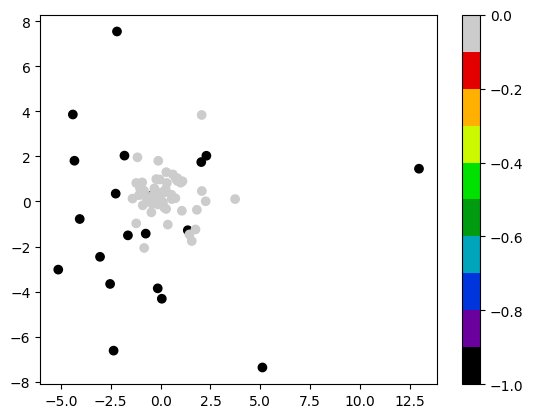

In [66]:
from sklearn.decomposition import PCA
n_dimensiones= 2
pca = PCA(n_components=n_dimensiones, random_state=42)
pca.fit(document_vectors)
# Cambio de base a dos dimensiones PCA
X_train_PCAspace = pca.transform(document_vectors)
print('Dim after PCA: ',X_train_PCAspace.shape)
plot_samples(300, n_dimensiones, X_train_PCAspace, cluster_labels)